<a href="https://colab.research.google.com/github/canmike/gis-segmentation/blob/main/baseline_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Getting Data

In [ ]:
!wget -O data.zip https://www.dropbox.com/scl/fi/k75ag58i704c7lgsdsvia/C2Seg_AB_splitted.zip?rlkey=jzxsa9ps06x64vfxt4e6rl0l5

--2024-11-18 16:02:18--  https://www.dropbox.com/scl/fi/k75ag58i704c7lgsdsvia/C2Seg_AB_splitted.zip?rlkey=jzxsa9ps06x64vfxt4e6rl0l5
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9d2acf5210929d920c9235c999.dl.dropboxusercontent.com/cd/0/inline/CemKJ2p_4r2QRHMGg9t1ujH8sGyRbcTRL-04JC23rQUt2eHxS_mNc494uo33UYzJhc--vEkS2o-SJYLnPtq9fas9Q0bvEdErDlDkrn8hoHLCxXxTFfXjUryh1BFcr2VA-kIqjsXBCYsxykHmTyCwqadT/file# [following]
--2024-11-18 16:02:19--  https://uc9d2acf5210929d920c9235c999.dl.dropboxusercontent.com/cd/0/inline/CemKJ2p_4r2QRHMGg9t1ujH8sGyRbcTRL-04JC23rQUt2eHxS_mNc494uo33UYzJhc--vEkS2o-SJYLnPtq9fas9Q0bvEdErDlDkrn8hoHLCxXxTFfXjUryh1BFcr2VA-kIqjsXBCYsxykHmTyCwqadT/file
Resolving uc9d2acf5210929d920c9235c999.dl.dropboxusercontent.com (uc9d2acf5210929d920c9235c999.dl.dropboxusercontent.com)... 162.125.

In [ ]:
import zipfile

data_path = "data"
with zipfile.ZipFile("data.zip", "r") as zip_ref:
    print("Unzipping data...")
    zip_ref.extractall(data_path)

Unzipping data...


## 1.1. Visualize Data

In [ ]:
from osgeo import gdal

def get_image(folder_path, index):
  file_path_msi = folder_path + '/msi/'+str(index)+'.tiff'
  file_path_sar = folder_path + '/sar/'+str(index)+'.tiff'
  file_path_label = folder_path + '/label/'+str(index)+'.tiff'

  img_msi = gdal.Open(file_path_msi)
  array_msi = img_msi.ReadAsArray()

  img_sar = gdal.Open(file_path_sar)
  array_sar = img_sar.ReadAsArray()

  img_label = gdal.Open(file_path_label)
  array_label = img_label.ReadAsArray()

  return array_msi, array_sar, array_label

folder_path = "/content/data/train"
index = 0
msi, sar, label = get_image(folder_path, index)

msi.shape, sar.shape, label.shape

((4, 128, 128), (2, 128, 128), (128, 128))

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap

label_map = np.array([
      (0, 0, 0),          # 0 - Background (Black)
      (0, 0, 255),        # 1 - Surface water (Blue)
      (135, 206, 250),    # 2 - Street (Light Sky Blue)
      (255, 255, 0),      # 3 - Urban Fabric (Yellow)
      (128, 0, 0),        # 4 - Industrial, commercial and transport (Maroon)
      (139, 37, 0),       # 5 - Mine, dump, and construction sites (Reddish Brown)
      (0, 128, 0),        # 6 - Artificial, vegetated areas (Green)
      (255, 165, 0),      # 7 - Arable Land (Orange)
      (0, 255, 0),        # 8 - Permanent Crops (Lime Green)
      (154, 205, 50),     # 9 - Pastures (Yellow Green)
      (34, 139, 34),      # 10 - Forests (Forest Green)
      (139, 69, 19),      # 11 - Shrub (Saddle Brown)
      (245, 245, 220),    # 12 - Open spaces with no vegetation (Beige)
      (0, 255, 255),      # 13 - Inland wetlands (Cyan)
  ])

labels = [
    "Background", "Surface water", "Street", "Urban Fabric", "Industrial, commercial and transport",
    "Mine, dump, and construction sites", "Artificial, vegetated areas", "Arable Land",
    "Permanent Crops", "Pastures", "Forests", "Shrub", "Open spaces with no vegetation", "Inland wetlands"
]

cls_to_label = {i: label for i, label in enumerate(labels)}
label_to_cls = {label: i for i, label in enumerate(labels)}

cmap = ListedColormap(label_map / 255.0)
NUM_CLASSES = len(labels)
NUM_CLASSES

14

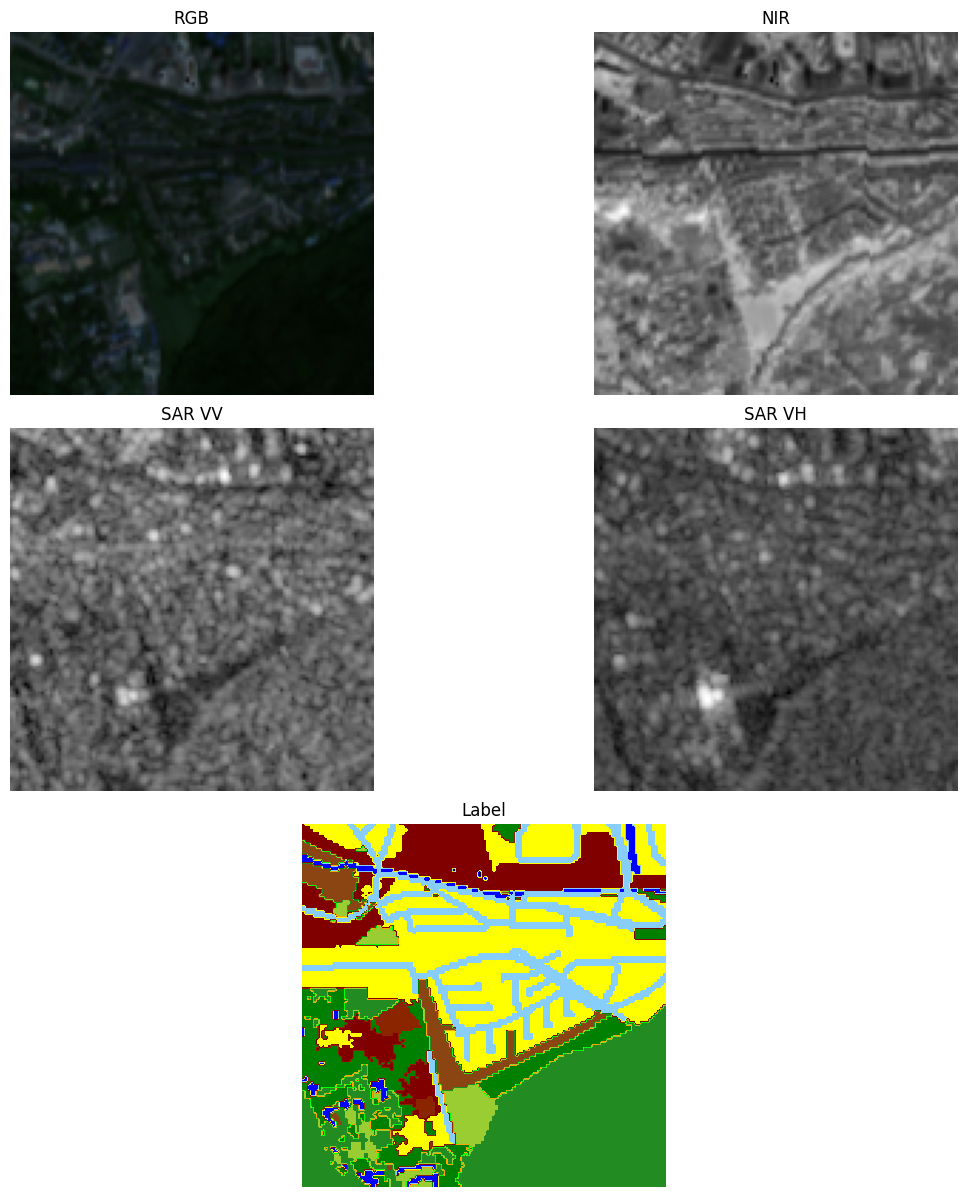

In [ ]:
import matplotlib.pyplot as plt

def visualize_img(msi, sar, label):
  msi = msi.copy()
  msi = msi - msi.min()
  msi = msi / msi.max()

  plt.figure(figsize=(15, 15))

  plt.subplot(3, 2, 1)
  plt.title("RGB")
  plt.imshow(msi[0:3].transpose(1, 2, 0))
  plt.axis('off')

  plt.subplot(3, 2, 2)
  plt.title("NIR")
  plt.imshow(msi[3], cmap='gray')
  plt.axis("off")

  plt.subplot(3, 2, 3)
  plt.title("SAR VV")
  plt.imshow(sar[0], cmap='gray')
  plt.axis("off")

  plt.subplot(3, 2, 4)
  plt.title("SAR VH")
  plt.imshow(sar[1], cmap='gray')
  plt.axis("off")

  plt.subplot(3, 1, 3)
  plt.title("Label")
  plt.imshow(label, cmap=cmap, vmin=0, vmax=NUM_CLASSES-1)
  plt.axis("off")

  plt.subplots_adjust(wspace=0.01, hspace=0.09)

  plt.show()

visualize_img(msi, sar, label)